# Logistic Regression

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sys
sys.path.append("../..//my-staff")
from database import load_ds

# Cargar dataset

In [13]:
X, y, features_names, class_names = load_ds("all")
X.shape

(293, 25)

In [5]:
X_train, y_train, _, _ = load_ds("train")
X_train.shape

(205, 25)

In [6]:
X_test, y_test, _, _ = load_ds("test")
X_test.shape

(88, 25)

In [7]:
from utils import grid_search_no_fss, SEED

In [8]:
model = LogisticRegression(random_state=SEED)

In [9]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],  # Valores para el hiperparámetro de regularización
    'penalty': ['l1', 'l2'],              # Tipo de penalización
    'max_iter': [1000, 2000, 3000, 4000, 5000],  # Número máximo de iteraciones
}


In [10]:
result = grid_search_no_fss(X_train, y_train, model, param_grid)

Starting evaluation with all variables


/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

f1 0.7797810033104151


/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
result

ResultGridSearch(best_model=LogisticRegression(C=0.1, max_iter=3000, random_state=8), best_num_features=205, selected_feature_names=['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Ascites_N', 'Ascites_Y', 'Drug_D-penicillamine', 'Drug_Placebo', 'Spiders_N', 'Spiders_Y', 'Sex_F', 'Sex_M', 'Edema_N', 'Edema_S', 'Edema_Y'], best_score=0.7797810033104151)

In [12]:
best_model = result.best_model

In [13]:
hipers = best_model.get_params()
hipers

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 3000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
features = result.selected_feature_names
features

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Ascites_N',
 'Ascites_Y',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Spiders_N',
 'Spiders_Y',
 'Sex_F',
 'Sex_M',
 'Edema_N',
 'Edema_S',
 'Edema_Y']

# Training the model

In [15]:
model = LogisticRegression(**hipers)

In [16]:
model.fit(X_train[features], y_train)

/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, max_iter=3000, random_state=8)

# Evaluation

In [17]:
from utils import eval_model

In [18]:
print("Training score: ", model.score(X_train[features], y_train))
print("Test score: ", model.score(X_test[features], y_test))

Training score:  0.8292682926829268
Test score:  0.8068181818181818


In [19]:
y_prob = model.predict_proba(X_test[features])[:,0]
y_pred = model.predict(X_test[features])
eval_model(y_true= y_test, y_pred=y_pred, y_prob=y_prob)

Métricas de evaluación:
Precision: 0.8076
Recall: 0.8068
F1-score: 0.8071
Brier Score: 0.5629


# Visualización del modelo

In [6]:
model = LogisticRegression()
model.fit(X, y)

/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
import pandas as pd

In [15]:
coeficientes = model.coef_

# Crear un DataFrame para mostrar los coeficientes
coeficientes_df = pd.DataFrame(coeficientes, columns=features_names)
coeficientes_df

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Spiders_Y,Hepatomegaly_N,Hepatomegaly_Y,Ascites_N,Ascites_Y,Edema_N,Edema_S,Edema_Y,Sex_F,Sex_M
0,-0.000938,0.018086,0.022955,0.000798,-0.003753,0.003791,0.000343,0.003965,0.000809,-0.005333,...,0.001209,-0.003739,0.002809,-0.002803,0.001873,-0.00278,0.000629,0.00122,-0.002432,0.001502


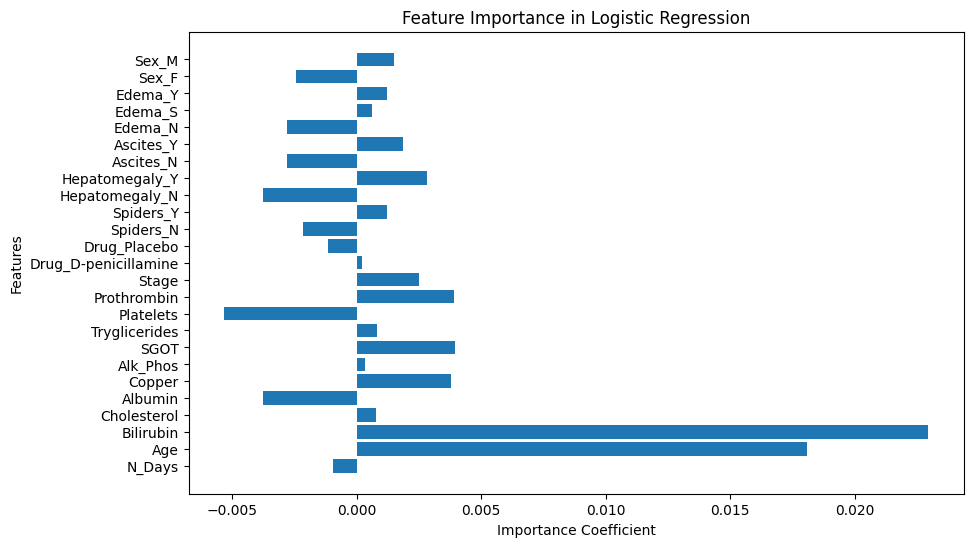

In [16]:
# Crear un gráfico de barras para visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(features_names, coeficientes_df.values[0])
plt.xlabel('Importance Coefficient')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.show()

Esto te ayudará a entender la superposición entre clases.

Valores Positivos y Negativos: Los coeficientes pueden ser positivos o negativos. Los valores positivos indican que una característica contribuye positivamente a una clase, es decir, cuando el valor de esa característica aumenta, la probabilidad de pertenecer a esa clase también aumenta. Los valores negativos tienen el efecto opuesto.

Magnitud de los Coeficientes: La magnitud de los coeficientes refleja la importancia relativa de una característica en la separación de clases. Cuanto mayor sea el valor absoluto de un coeficiente, más influencia tiene en la proyección LDA y, por lo tanto, en la separación de clases.

Características Relevantes: Las características con coeficientes positivos grandes son las más relevantes para una clase específica. Por otro lado, las características con coeficientes negativos grandes son relevantes para la otra clase. Puedes identificar cuáles características son las más importantes para cada clase en el gráfico.

Características No Relevantes: Las características con coeficientes cercanos a cero tienen una influencia mínima en la separación de clases y, por lo tanto, se consideran menos relevantes.
